In [2]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = '/home/BS94_SUR/phD/review/datasets/scvae datasets/pbmc'

In [4]:
files = ['b_cells', 'cd34', 'cd4_t_helper', 'cd56_nk',
        'cytotoxic_t', 'memory_t', 'naive_cytotoxic', 'naive_t',
        'regulatory_t']

In [5]:
adata_combined = ad.AnnData()
for i, file in enumerate(files):
    adata = sc.read_10x_mtx(
        path + '/' + f"{file}_filtered_gene_bc_matrices/filtered_matrices_mex/hg19/",  # Path to extracted files
        var_names='gene_symbols',      # Use gene symbols for var names
        cache=True
    )
    adata.obs['Cell Type'] = file
    #adata.obs['batch'] = i
    
    if adata_combined.n_obs == 0:
        adata_combined = adata
    else:
        adata_combined = ad.concat([adata_combined, adata], join='outer', axis=0)
adata_combined

/home/BS94_SUR/conda_env/new_env_scvae_2/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 92043 × 32738
    obs: 'Cell Type'

In [6]:
adata = adata_combined

In [7]:
cells_mapping = {'b_cells': 'CD19+ B cells', 
                 'cd34': 'CD34+ cells', 
                 'cd4_t_helper': 'CD4+ helper T cells', 
                 'cd56_nk': 'CD56+ natural killer cells,',
                 'cytotoxic_t': 'CD8+ cytotoxic T cells', 
                 'memory_t': 'CD4+/CD45RO+ memory T cells', 
                 'naive_cytotoxic': 'CD8+/CD45RA+ naïve cytotoxic T cells',
                 'naive_t': 'CD4+/CD45RA+/CD25- naïve T cells',
                 'regulatory_t': 'CD4+/CD25+ regulatoryT cells'

}
adata.obs['Cell Type'] = adata.obs['Cell Type'].map(cells_mapping)

In [8]:
df_expression = pd.DataFrame.sparse.from_spmatrix(
    adata.X,
    index=adata.obs_names,
    columns=adata.var_names
)
df_expression.head(5)

MIR1302-10  FAM138A  OR4F5  RP11-34P13.7  RP11-34P13.8  \
AAACATACAATGCC-1         0.0      0.0    0.0           0.0           0.0   
AAACATACACGCAT-1         0.0      0.0    0.0           0.0           0.0   
AAACATACGAATAG-1         0.0      0.0    0.0           0.0           0.0   
AAACATACGGTGTT-1         0.0      0.0    0.0           0.0           0.0   
AAACATACGTGTCA-1         0.0      0.0    0.0           0.0           0.0   

                  AL627309.1  RP11-34P13.14  RP11-34P13.9  AP006222.2  \
AAACATACAATGCC-1         0.0            0.0           0.0         0.0   
AAACATACACGCAT-1         0.0            0.0           0.0         0.0   
AAACATACGAATAG-1         0.0            0.0           0.0         0.0   
AAACATACGGTGTT-1         0.0            0.0           0.0         0.0   
AAACATACGTGTCA-1         0.0            0.0           0.0         0.0   

                  RP4-669L17.10  ...  KIR3DL2-1  AL590523.1  CT476828.1  \
AAACATACAATGCC-1            0.0  ...        0.0         0.0         0.0   
AAACATACACGCAT-1            0.0  ...        0.0         0.0         0.0   
AAACATACGAATAG-1            0.0  ...        0.0         0.0         0.0   
AAACATACGGTGTT-1            0.0  ...        0.0         0.0         0.0   
AAACATACGTGTCA-1            0.0  ...        0.0         0.0         0.0   

                  PNRC2-1  SRSF10-1  AC145205.1  BAGE5  CU459201.1  \
AAACATACAATGCC-1      0.0       1.0         0.0    0.0         0.0   
AAACATACACGCAT-1      0.0       0.0         0.0    0.0         0.0   
AAACATACGAATAG-1      0.0       0.0         0.0    0.0         0.0   
AAACATACGGTGTT-1      0.0       0.0         0.0    0.0         0.0   
AAACATACGTGTCA-1      0.0       0.0         0.0    0.0         0.0   

                  AC002321.2  AC002321.1  
AAACATACAATGCC-1         0.0         0.0  
AAACATACACGCAT-1         0.0         0.0  
AAACATACGAATAG-1         0.0         0.0  
AAACATACGGTGTT-1         0.0         0.0  
AAACATACGTGTCA-1         0.0         0.0  

[5 rows x 32738 columns]

/var/tmp/ipykernel_157286/1842239494.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(expression)
/var/tmp/ipykernel_157286/1842239494.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(expression)


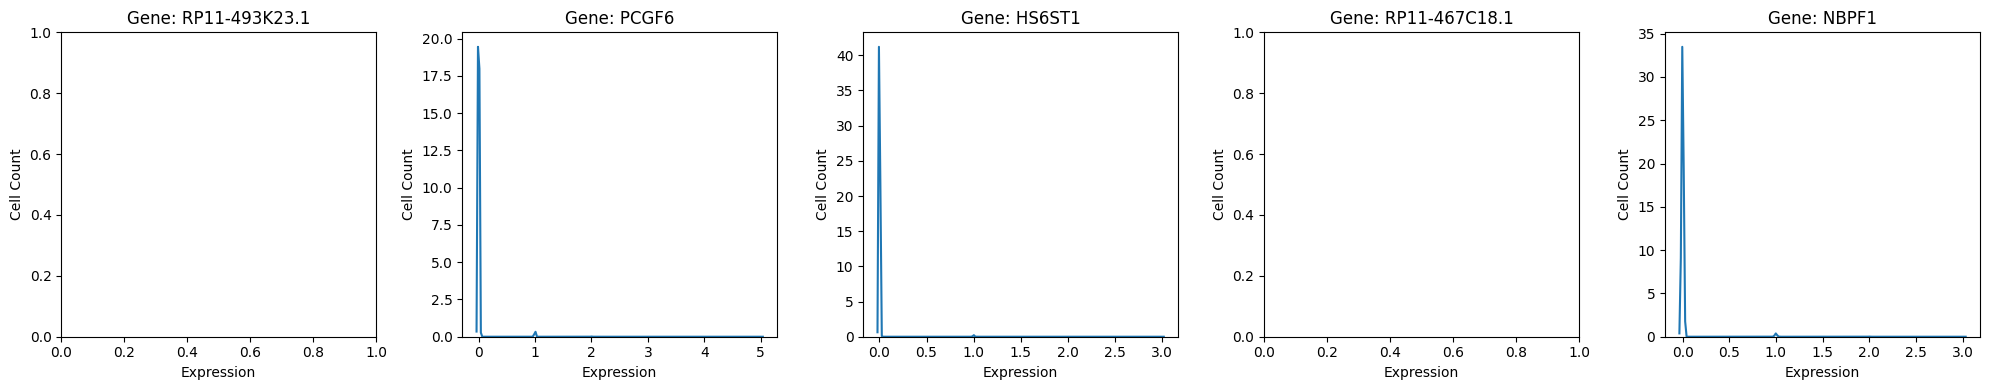

In [79]:
def plot_random_gene_distributions(adata, n_genes=5, seed=42):
    """
    Plots the expression distributions of `n_genes` randomly selected genes across all cells.

    Parameters:
    - adata: AnnData object with .X as expression matrix
    - n_genes: Number of random genes to plot
    - seed: Random seed for reproducibility
    """
    np.random.seed(seed)
    
    # Get gene names
    gene_names = adata.var_names
    selected_genes = np.random.choice(gene_names, size=n_genes, replace=False)
    
    # Setup the plot
    plt.figure(figsize=(4 * n_genes, 4))
    
    for i, gene in enumerate(selected_genes):
        idx = gene_names.get_loc(gene)
        expression = adata.X[:, idx].toarray().flatten() if hasattr(adata.X, "toarray") else adata.X[:, idx]
        
        plt.subplot(1, n_genes, i + 1)
        sns.kdeplot(expression)
        plt.title(f"Gene: {gene}")
        plt.xlabel("Expression")
        plt.ylabel("Cell Count")
    
    plt.tight_layout()
    plt.show()
plot_random_gene_distributions(adata, n_genes=5, seed=42)

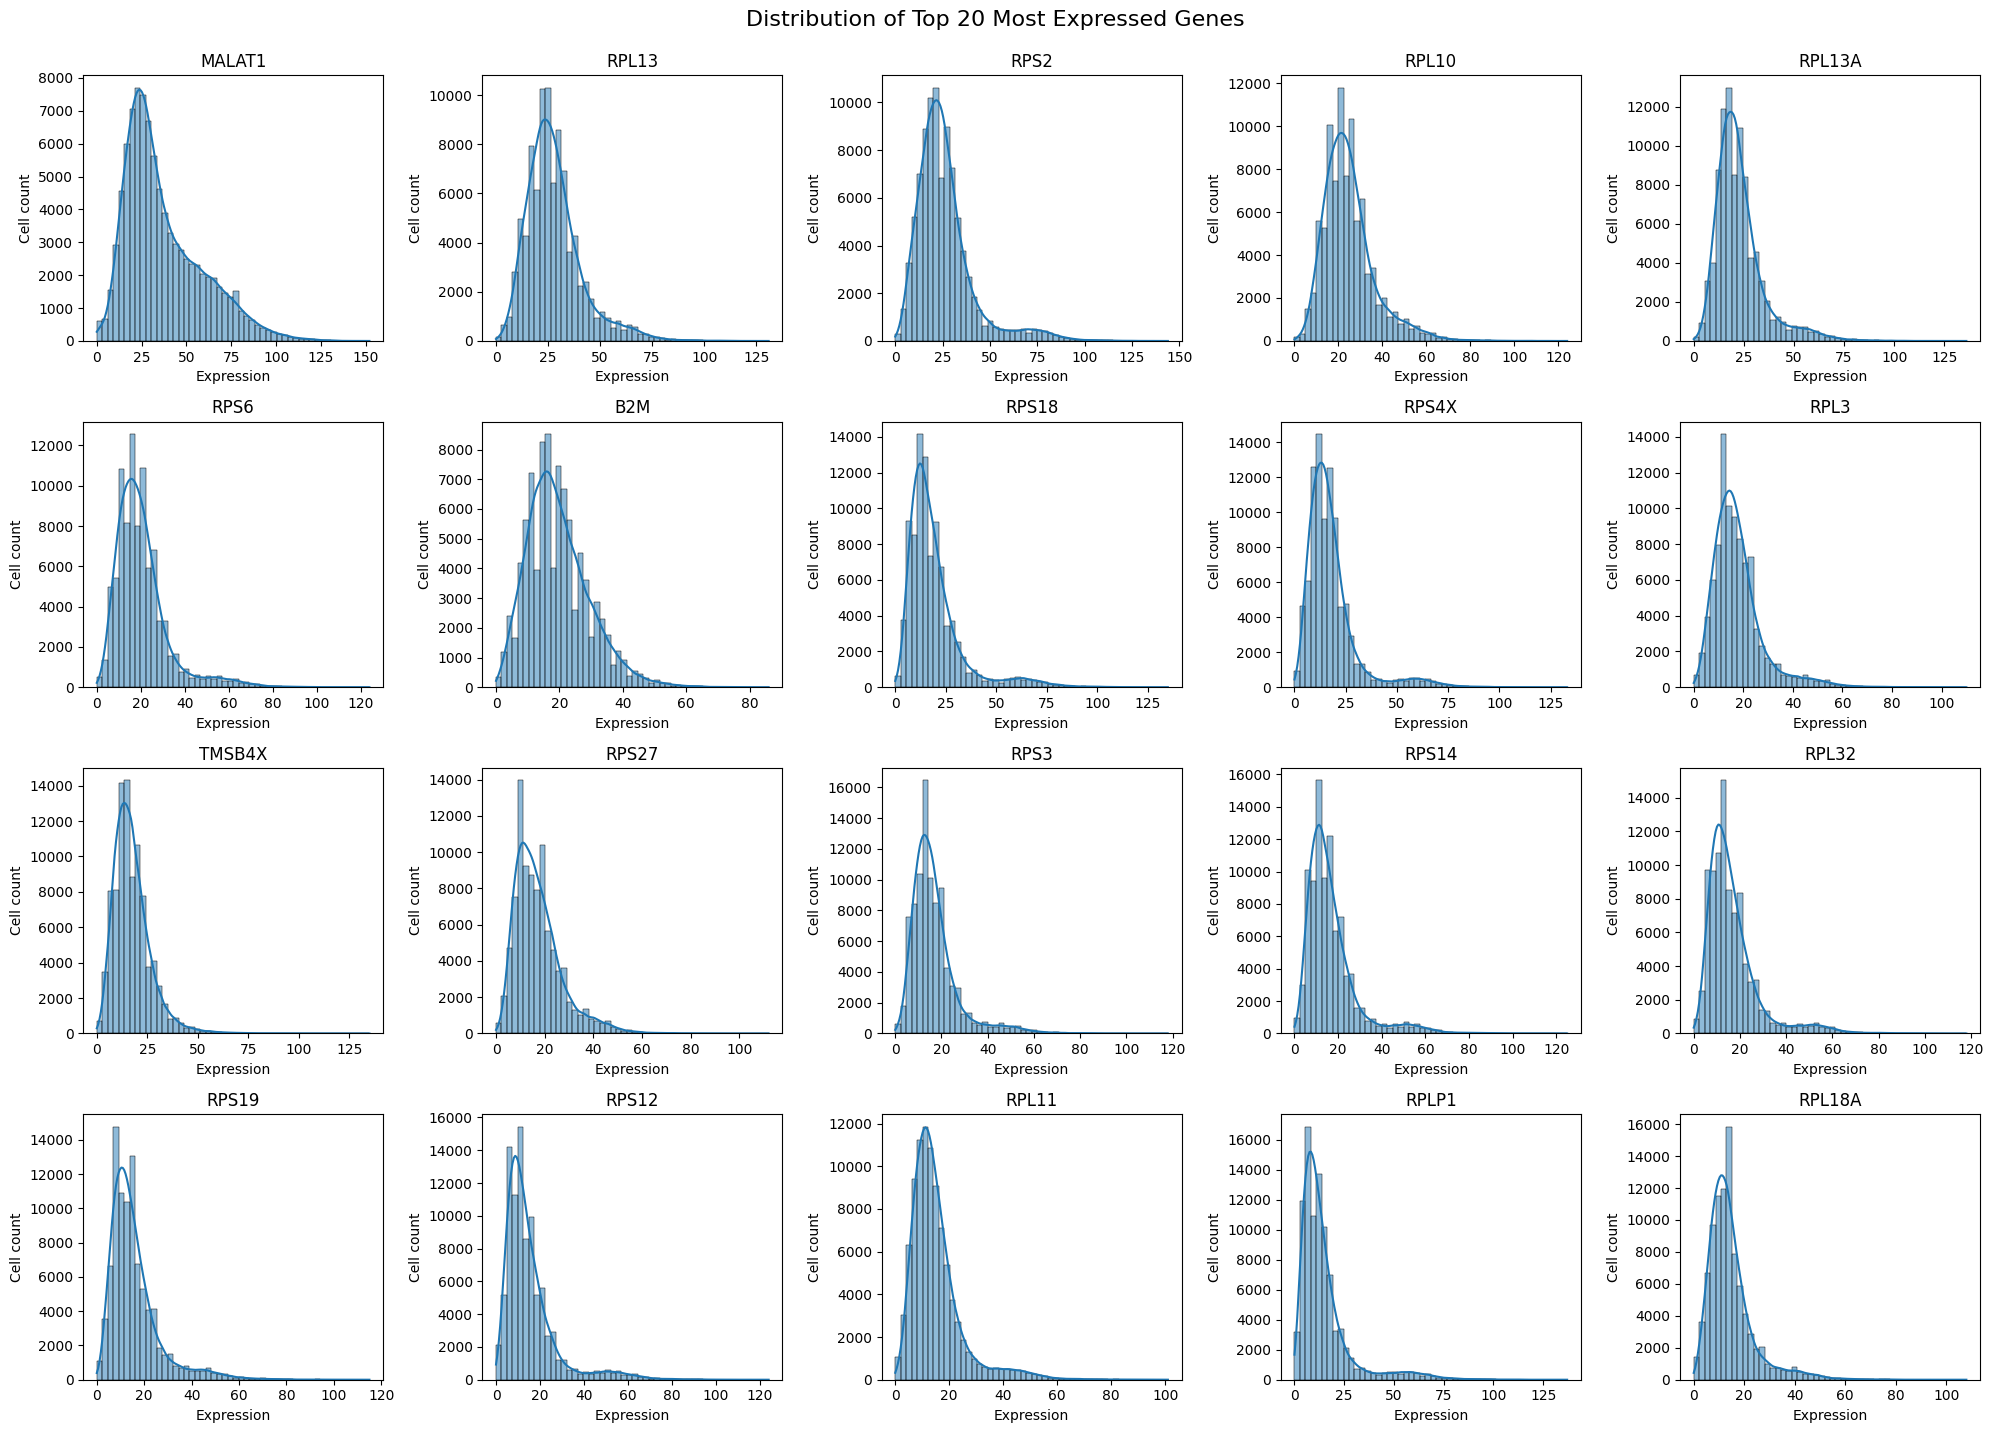

In [109]:
def plot_top_gene_distributions(adata, top_n=20, bins=50):
    """
    Plot histograms showing expression distributions of the top `top_n` most expressed genes.

    Parameters:
    - adata: AnnData object
    - top_n: Number of top expressed genes to plot
    - bins: Number of histogram bins
    """
    # Sum counts per gene (axis=0)
    gene_sums = np.asarray(adata.X.sum(axis=0)).flatten()
    gene_names = adata.var_names

    # Get top genes
    top_indices = np.argsort(gene_sums)[-top_n:][::-1]
    top_gene_names = gene_names[top_indices]

    # Plot setup
    n_cols = 5
    n_rows = int(np.ceil(top_n / n_cols))
    plt.figure(figsize=(4 * n_cols, 3.5 * n_rows))

    for i, idx in enumerate(top_indices):
        gene = gene_names[idx]
        expression = adata.X[:, idx].toarray().flatten() if hasattr(adata.X, "toarray") else adata.X[:, idx]

        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(expression, bins=bins, kde=True)
        plt.title(gene)
        plt.xlabel("Expression")
        plt.ylabel("Cell count")

    plt.tight_layout()
    plt.suptitle(f"Distribution of Top {top_n} Most Expressed Genes", fontsize=16, y=1.02)
    plt.show()
    
    return top_indices, top_gene_names
top_indices, top_gene_names = plot_top_gene_distributions(adata, top_n=20, bins=50)

In [112]:
top_gene_names

Index(['MALAT1', 'RPL13', 'RPS2', 'RPL10', 'RPL13A', 'RPS6', 'B2M', 'RPS18',
       'RPS4X', 'RPL3', 'TMSB4X', 'RPS27', 'RPS3', 'RPS14', 'RPL32', 'RPS19',
       'RPS12', 'RPL11', 'RPLP1', 'RPL18A'],
      dtype='object')

In [104]:
gene_sums = np.asarray(adata.X.sum(axis=0)).flatten()
n_genes_total = len(gene_sums)
n_genes_zero = np.sum(gene_sums == 0)
n_genes_expressed = n_genes_total - n_genes_zero

/var/tmp/ipykernel_157286/2597032467.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gene Expression', y='Count', palette='pastel')


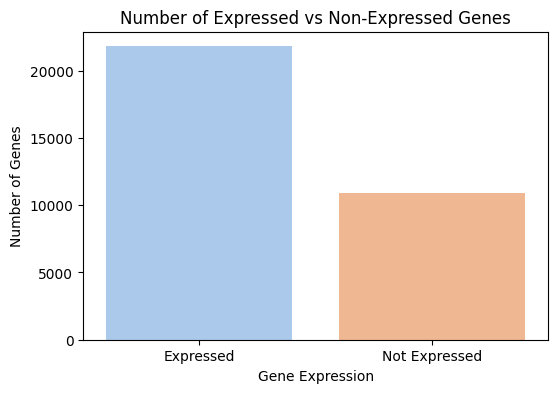

In [110]:
df = pd.DataFrame({
    'Gene Expression': ['Expressed', 'Not Expressed'],
    'Count': [n_genes_expressed, n_genes_zero]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Gene Expression', y='Count', palette='pastel')
plt.title("Number of Expressed vs Non-Expressed Genes")
plt.ylabel("Number of Genes")
plt.show()

In [124]:
X_norm = sc.pp.normalize_total(adata, target_sum=1, inplace=False)["X"]
X_norm

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 58800686 stored elements and shape (92043, 32738)>

In [127]:
#adata.write(path + '/' + 'adata.h5ad')

In [129]:
df_expression

MIR1302-10  FAM138A  OR4F5  RP11-34P13.7  RP11-34P13.8  \
AAACATACAATGCC-1           0        0      0             0             0   
AAACATACACGCAT-1           0        0      0             0             0   
AAACATACGAATAG-1           0        0      0             0             0   
AAACATACGGTGTT-1           0        0      0             0             0   
AAACATACGTGTCA-1           0        0      0             0             0   
...                      ...      ...    ...           ...           ...   
TTTGCATGAGAATG-1           0        0      0             0             0   
TTTGCATGCCTCGT-1           0        0      0             0             0   
TTTGCATGTAACCG-1           0        0      0             0             0   
TTTGCATGTGCAGT-1           0        0      0             0             0   
TTTGCATGTTGTCT-1           0        0      0             0             0   

                  AL627309.1  RP11-34P13.14  RP11-34P13.9  AP006222.2  \
AAACATACAATGCC-1           0              0             0           0   
AAACATACACGCAT-1           0              0             0           0   
AAACATACGAATAG-1           0              0             0           0   
AAACATACGGTGTT-1           0              0             0           0   
AAACATACGTGTCA-1           0              0             0           0   
...                      ...            ...           ...         ...   
TTTGCATGAGAATG-1           0              0             0           0   
TTTGCATGCCTCGT-1           0              0             0           0   
TTTGCATGTAACCG-1           0              0             0           0   
TTTGCATGTGCAGT-1           0              0             0           0   
TTTGCATGTTGTCT-1           0              0             0           0   

                  RP4-669L17.10  ...  KIR3DL2-1  AL590523.1  CT476828.1  \
AAACATACAATGCC-1              0  ...          0           0           0   
AAACATACACGCAT-1              0  ...          0           0           0   
AAACATACGAATAG-1              0  ...          0           0           0   
AAACATACGGTGTT-1              0  ...          0           0           0   
AAACATACGTGTCA-1              0  ...          0           0           0   
...                         ...  ...        ...         ...         ...   
TTTGCATGAGAATG-1              0  ...          0           0           0   
TTTGCATGCCTCGT-1              0  ...          0           0           0   
TTTGCATGTAACCG-1              0  ...          0           0           0   
TTTGCATGTGCAGT-1              0  ...          0           0           0   
TTTGCATGTTGTCT-1              0  ...          0           0           0   

                  PNRC2-1  SRSF10-1  AC145205.1  BAGE5  CU459201.1  \
AAACATACAATGCC-1        0       1.0           0      0           0   
AAACATACACGCAT-1        0         0           0      0           0   
AAACATACGAATAG-1        0         0           0      0           0   
AAACATACGGTGTT-1        0         0           0      0           0   
AAACATACGTGTCA-1        0         0           0      0           0   
...                   ...       ...         ...    ...         ...   
TTTGCATGAGAATG-1        0         0           0      0           0   
TTTGCATGCCTCGT-1        0         0           0      0           0   
TTTGCATGTAACCG-1        0         0           0      0           0   
TTTGCATGTGCAGT-1        0         0           0      0           0   
TTTGCATGTTGTCT-1        0         0           0      0           0   

                  AC002321.2  AC002321.1  
AAACATACAATGCC-1           0           0  
AAACATACACGCAT-1           0           0  
AAACATACGAATAG-1           0           0  
AAACATACGGTGTT-1           0           0  
AAACATACGTGTCA-1           0           0  
...                      ...         ...  
TTTGCATGAGAATG-1           0           0  
TTTGCATGCCTCGT-1           0           0  
TTTGCATGTAACCG-1           0           0  
TTTGCATGTGCAGT-1           0           0  
TTTGCATGTTGTC

In [10]:
#df_expression.to_csv(path + '/' + "gene_expression.csv")